# Testfield for drawing

In [338]:
import duckdb as dd
import pandas as pd
from duck_tools import *

## Read data to a df


In [756]:
#Käytä Silver-databasea
tbl = "Silver_SensorData"
#Valitse node
node = "3200"

df = read_node(tbl, node)
df

node_id                  timestamp    x     y
0           3200 2019-03-07 13:46:19.078016    0     0
1           3200 2019-03-07 13:46:20.078012    0     0
2           3200 2019-03-07 13:46:21.078081    0     0
3           3200 2019-03-07 13:46:22.078130    0     0
4           3200 2019-03-14 11:57:31.687637  228  1084
...          ...                        ...  ...   ...
1083202     3200 2020-01-22 19:53:28.478998  265  1187
1083203     3200 2020-01-22 19:53:32.478699  253  1143
1083204     3200 2020-01-22 19:53:35.478839  256  1152
1083205     3200 2020-01-22 19:53:46.479005  745  2914
1083206     3200 2020-01-22 19:53:46.479008  745  2914

[1083207 rows x 4 columns]

In [760]:
## Datan putkitus ja testaus
### Säädä tässä parametreja
df_lim = df[8100:8480]
#df_lim
#kalibrointia varten: jätetään reunapisteet näkyviin. Näitä ei tarvita jos Silver database on päivitetty 7.4.2024 jälkeen
#df_ylim_upper = df_lim[(df_lim['y'] < 200)]
#df_ylim_lower = df_lim[(df_lim['y'] > 5100)]
#df_xlim_left = df_lim[(df_lim['x'] > -700) & (df_lim['x'] < 20 )]
#df_xlim_right = df_lim[(df_lim['x'] > 10000) & (df_lim['x'] < 10250) ]
#df_lim = pd.concat([df_ylim_upper, df_ylim_lower, df_xlim_left, df_xlim_right])


#latausasema 0krs datapisteet suodatettu. Silver pipe päivitetty 7.4.2024. Aja uudet samplet tietokantaan.
#df_lim = df_lim[df_lim['x'].between(-150, 1600) & (df_lim['y'] > 3000)]

#latausasema 1krs. datapisteiden suodatus. Silver pipe päivitetty 7.4.2024. Aja uudet samplet tietokantaan.
#df_lim = df_lim[(df_lim['y']> 2000) & df_lim['x'].between(-150, 550)]

#pd.Timedelta(seconds=5)
df_lim.describe()

node_id                   timestamp            x            y
count    380.0                         380   380.000000   380.000000
mean    3200.0  2019-03-15 15:41:02.662302  7531.260526  1381.642105
min     3200.0  2019-03-15 15:37:45.687656  2669.000000   685.000000
25%     3200.0  2019-03-15 15:39:18.444400  7307.000000  1157.000000
50%     3200.0  2019-03-15 15:41:08.194443  7750.000000  1266.000000
75%     3200.0  2019-03-15 15:42:39.944377  7920.500000  1582.000000
max     3200.0  2019-03-15 15:44:06.692642  8952.000000  2180.000000
std        0.0                         NaN   898.606190   328.507384

In [750]:
## aikaerotestauksia
#aika = (df_lim['timestamp'].max() - df_lim['timestamp'].min()) / pd.Timedelta(seconds=1)
#print("Aikaero sekunneissa:", aika)
#aika = ((df_lim['timestamp'][8203] - df_lim['timestamp'][8202]) / pd.Timedelta(seconds=1))
#aika
#df_lim['difference'] = (df_lim['timestamp'] - df_lim['timestamp'].shift())



In [762]:
#Euklidinen etäisyys
# de = ((x1-x2)**2 + (y1-y2)**2))**0.5
df_lim['distance'] = ((df_lim['x'] - df_lim['x'].shift())**2 + (df_lim['y'] - df_lim['y'].shift())**2)**0.5
df_lim
threshold_distance = 300 #max ero edelliseen datapisteeseen

for index, rows in df_lim.iterrows():
    if rows['distance'] > threshold_distance:
        index_loc = (index-1) #vertausarvo indexinä
        print(index_loc)
        
        for index2, rows2 in df_lim.loc[index_loc:].iterrows():
            i = 0
            print(index2)
            df_test = df_lim.loc[index_loc+i:index2+1]
            df_test['distance'] = ((df_test['x'] - df_test['x'].shift())**2 + (df_test['y'] - df_test['y'].shift())**2)**0.5
            print(df_test)
            i += 1
            
            #if df_test['distance'].loc[index2+1] > threshold_distance:
            #    df_lim.drop(index2+1, inplace=True)
            #    df_test = 0

            #else:
            #    break




#for i in range(1):
#    df_lim = df_lim[(df_lim['distance'] < threshold_distance)]
# lisää tämä yllä olevaan riviin jos haluat antaa aikarajoitteita "((df_lim['timestamp'] - df_lim['timestamp'].shift()) < pd.Timedelta(seconds=3)) & "


#filtteröinti
#df_limited = df_lim[(df_lim['timestamp'] - df_lim['timestamp'].shift() > pd.Timedelta(seconds=10))]
#print(df_lim.loc[5150:5160])
df_lim.describe()

/tmp/ipykernel_1922/2738348052.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lim['distance'] = ((df_lim['x'] - df_lim['x'].shift())**2 + (df_lim['y'] - df_lim['y'].shift())**2)**0.5
/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['distance'] = ((df_test['x'] - df_test['x'].shift())**2 + (df_test['y'] - df_test['y'].shift())**2)**0.5
/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

8202
8202
      node_id                  timestamp     x     y     distance
8202     3200 2019-03-15 15:39:25.694947  7757  1806          NaN
8203     3200 2019-03-15 15:39:46.694331  2669   685  5210.027351
8203
      node_id                  timestamp     x     y     distance
8202     3200 2019-03-15 15:39:25.694947  7757  1806          NaN
8203     3200 2019-03-15 15:39:46.694331  2669   685  5210.027351
8204     3200 2019-03-15 15:39:47.694351  3102   786   444.623436
8204
      node_id                  timestamp     x     y     distance
8202     3200 2019-03-15 15:39:25.694947  7757  1806          NaN
8203     3200 2019-03-15 15:39:46.694331  2669   685  5210.027351
8204     3200 2019-03-15 15:39:47.694351  3102   786   444.623436
8205     3200 2019-03-15 15:39:48.694356  3511   882   420.115460
8205
      node_id                  timestamp     x     y     distance
8202     3200 2019-03-15 15:39:25.694947  7757  1806          NaN
8203     3200 2019-03-15 15:39:46.694331  2669   68

/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['distance'] = ((df_test['x'] - df_test['x'].shift())**2 + (df_test['y'] - df_test['y'].shift())**2)**0.5
/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['distance'] = ((df_test['x'] - df_test['x'].shift())**2 + (df_test['y'] - df_test['y'].shift())**2)**0.5
/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

      node_id                  timestamp     x     y     distance
8202     3200 2019-03-15 15:39:25.694947  7757  1806          NaN
8203     3200 2019-03-15 15:39:46.694331  2669   685  5210.027351
8204     3200 2019-03-15 15:39:47.694351  3102   786   444.623436
8205     3200 2019-03-15 15:39:48.694356  3511   882   420.115460
8206     3200 2019-03-15 15:39:49.694382  3884   969   383.011749
...       ...                        ...   ...   ...          ...
8299     3200 2019-03-15 15:41:17.695009  7802  1340    54.129474
8300     3200 2019-03-15 15:41:18.694426  7781  1408    71.168813
8301     3200 2019-03-15 15:41:19.694439  7831  1437    57.801384
8302     3200 2019-03-15 15:41:20.694509  7807  1485    53.665631
8303     3200 2019-03-15 15:41:21.694531  7817  1502    19.723083

[102 rows x 5 columns]
8303
      node_id                  timestamp     x     y     distance
8202     3200 2019-03-15 15:39:25.694947  7757  1806          NaN
8203     3200 2019-03-15 15:39:46.694331  2669 

/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['distance'] = ((df_test['x'] - df_test['x'].shift())**2 + (df_test['y'] - df_test['y'].shift())**2)**0.5
/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['distance'] = ((df_test['x'] - df_test['x'].shift())**2 + (df_test['y'] - df_test['y'].shift())**2)**0.5
/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

      node_id                  timestamp     x     y     distance
8202     3200 2019-03-15 15:39:25.694947  7757  1806          NaN
8203     3200 2019-03-15 15:39:46.694331  2669   685  5210.027351
8204     3200 2019-03-15 15:39:47.694351  3102   786   444.623436
8205     3200 2019-03-15 15:39:48.694356  3511   882   420.115460
8206     3200 2019-03-15 15:39:49.694382  3884   969   383.011749
...       ...                        ...   ...   ...          ...
8417     3200 2019-03-15 15:43:06.694451  7716  1141    55.362442
8418     3200 2019-03-15 15:43:07.694446  7689  1081    65.795137
8419     3200 2019-03-15 15:43:08.694751  7653  1015    75.179785
8420     3200 2019-03-15 15:43:09.694427  7602   970    68.014704
8421     3200 2019-03-15 15:43:10.694590  7543   940    66.189123

[220 rows x 5 columns]
8421
      node_id                  timestamp     x     y     distance
8202     3200 2019-03-15 15:39:25.694947  7757  1806          NaN
8203     3200 2019-03-15 15:39:46.694331  2669 

/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['distance'] = ((df_test['x'] - df_test['x'].shift())**2 + (df_test['y'] - df_test['y'].shift())**2)**0.5
/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['distance'] = ((df_test['x'] - df_test['x'].shift())**2 + (df_test['y'] - df_test['y'].shift())**2)**0.5
/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

      node_id                  timestamp     x     y    distance
8203     3200 2019-03-15 15:39:46.694331  2669   685         NaN
8204     3200 2019-03-15 15:39:47.694351  3102   786  444.623436
8205     3200 2019-03-15 15:39:48.694356  3511   882  420.115460
8206     3200 2019-03-15 15:39:49.694382  3884   969  383.011749
8207     3200 2019-03-15 15:39:50.694435  4215  1046  339.838197
8208     3200 2019-03-15 15:39:51.694470  4500  1113  292.769534
8209     3200 2019-03-15 15:39:52.694999  4740  1169  246.446749
8210     3200 2019-03-15 15:39:53.694400  4935  1214  200.124961
8211     3200 2019-03-15 15:39:54.694402  5089  1250  158.151826
8212     3200 2019-03-15 15:39:55.694385  5089  1250    0.000000
8213     3200 2019-03-15 15:39:55.694412  5205  1277  119.100798
8214     3200 2019-03-15 15:39:56.694395  5288  1297   85.375641
8215     3200 2019-03-15 15:39:57.694375  5342  1309   55.317267
8216     3200 2019-03-15 15:39:58.694390  5372  1316   30.805844
8217     3200 2019-03-15 

/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['distance'] = ((df_test['x'] - df_test['x'].shift())**2 + (df_test['y'] - df_test['y'].shift())**2)**0.5
/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['distance'] = ((df_test['x'] - df_test['x'].shift())**2 + (df_test['y'] - df_test['y'].shift())**2)**0.5
/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

      node_id                  timestamp     x     y    distance
8203     3200 2019-03-15 15:39:46.694331  2669   685         NaN
8204     3200 2019-03-15 15:39:47.694351  3102   786  444.623436
8205     3200 2019-03-15 15:39:48.694356  3511   882  420.115460
8206     3200 2019-03-15 15:39:49.694382  3884   969  383.011749
8207     3200 2019-03-15 15:39:50.694435  4215  1046  339.838197
...       ...                        ...   ...   ...         ...
8367     3200 2019-03-15 15:42:24.694574  7740  1243    2.828427
8368     3200 2019-03-15 15:42:25.694575  7738  1244    2.236068
8369     3200 2019-03-15 15:42:26.694686  7740  1242    2.828427
8370     3200 2019-03-15 15:42:27.694399  7748  1238    8.944272
8371     3200 2019-03-15 15:42:28.694768  7743  1239    5.099020

[169 rows x 5 columns]
8371
      node_id                  timestamp     x     y    distance
8203     3200 2019-03-15 15:39:46.694331  2669   685         NaN
8204     3200 2019-03-15 15:39:47.694351  3102   786  444.623

/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['distance'] = ((df_test['x'] - df_test['x'].shift())**2 + (df_test['y'] - df_test['y'].shift())**2)**0.5
/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['distance'] = ((df_test['x'] - df_test['x'].shift())**2 + (df_test['y'] - df_test['y'].shift())**2)**0.5
/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

      node_id                  timestamp     x     y    distance
8204     3200 2019-03-15 15:39:47.694351  3102   786         NaN
8205     3200 2019-03-15 15:39:48.694356  3511   882  420.115460
8206     3200 2019-03-15 15:39:49.694382  3884   969  383.011749
8207     3200 2019-03-15 15:39:50.694435  4215  1046  339.838197
8208     3200 2019-03-15 15:39:51.694470  4500  1113  292.769534
8208
      node_id                  timestamp     x     y    distance
8204     3200 2019-03-15 15:39:47.694351  3102   786         NaN
8205     3200 2019-03-15 15:39:48.694356  3511   882  420.115460
8206     3200 2019-03-15 15:39:49.694382  3884   969  383.011749
8207     3200 2019-03-15 15:39:50.694435  4215  1046  339.838197
8208     3200 2019-03-15 15:39:51.694470  4500  1113  292.769534
8209     3200 2019-03-15 15:39:52.694999  4740  1169  246.446749
8209
      node_id                  timestamp     x     y    distance
8204     3200 2019-03-15 15:39:47.694351  3102   786         NaN
8205     3200 2

/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['distance'] = ((df_test['x'] - df_test['x'].shift())**2 + (df_test['y'] - df_test['y'].shift())**2)**0.5
/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['distance'] = ((df_test['x'] - df_test['x'].shift())**2 + (df_test['y'] - df_test['y'].shift())**2)**0.5
/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

      node_id                  timestamp     x     y    distance
8204     3200 2019-03-15 15:39:47.694351  3102   786         NaN
8205     3200 2019-03-15 15:39:48.694356  3511   882  420.115460
8206     3200 2019-03-15 15:39:49.694382  3884   969  383.011749
8207     3200 2019-03-15 15:39:50.694435  4215  1046  339.838197
8208     3200 2019-03-15 15:39:51.694470  4500  1113  292.769534
...       ...                        ...   ...   ...         ...
8279     3200 2019-03-15 15:40:58.694785  7940  1181   22.090722
8280     3200 2019-03-15 15:40:59.694501  7925  1154   30.886890
8281     3200 2019-03-15 15:41:00.694339  7922  1133   21.213203
8282     3200 2019-03-15 15:41:01.694342  7910  1111   25.059928
8283     3200 2019-03-15 15:41:02.694427  7910  1111    0.000000

[80 rows x 5 columns]
8283
      node_id                  timestamp     x     y    distance
8204     3200 2019-03-15 15:39:47.694351  3102   786         NaN
8205     3200 2019-03-15 15:39:48.694356  3511   882  420.1154

/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['distance'] = ((df_test['x'] - df_test['x'].shift())**2 + (df_test['y'] - df_test['y'].shift())**2)**0.5
/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['distance'] = ((df_test['x'] - df_test['x'].shift())**2 + (df_test['y'] - df_test['y'].shift())**2)**0.5
/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

      node_id                  timestamp     x     y    distance
8204     3200 2019-03-15 15:39:47.694351  3102   786         NaN
8205     3200 2019-03-15 15:39:48.694356  3511   882  420.115460
8206     3200 2019-03-15 15:39:49.694382  3884   969  383.011749
8207     3200 2019-03-15 15:39:50.694435  4215  1046  339.838197
8208     3200 2019-03-15 15:39:51.694470  4500  1113  292.769534
...       ...                        ...   ...   ...         ...
8373     3200 2019-03-15 15:42:30.694399  7754  1234    5.830952
8374     3200 2019-03-15 15:42:31.694976  7754  1234    0.000000
8375     3200 2019-03-15 15:42:31.695005  7751  1233    3.162278
8376     3200 2019-03-15 15:42:32.694449  7751  1233    0.000000
8377     3200 2019-03-15 15:42:32.694478  7749  1234    2.236068

[174 rows x 5 columns]
8377
      node_id                  timestamp     x     y    distance
8204     3200 2019-03-15 15:39:47.694351  3102   786         NaN
8205     3200 2019-03-15 15:39:48.694356  3511   882  420.115

/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['distance'] = ((df_test['x'] - df_test['x'].shift())**2 + (df_test['y'] - df_test['y'].shift())**2)**0.5
/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['distance'] = ((df_test['x'] - df_test['x'].shift())**2 + (df_test['y'] - df_test['y'].shift())**2)**0.5
/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

      node_id                  timestamp     x     y    distance
8204     3200 2019-03-15 15:39:47.694351  3102   786         NaN
8205     3200 2019-03-15 15:39:48.694356  3511   882  420.115460
8206     3200 2019-03-15 15:39:49.694382  3884   969  383.011749
8207     3200 2019-03-15 15:39:50.694435  4215  1046  339.838197
8208     3200 2019-03-15 15:39:51.694470  4500  1113  292.769534
...       ...                        ...   ...   ...         ...
8459     3200 2019-03-15 15:43:47.692485  6433  1049   42.379240
8460     3200 2019-03-15 15:43:48.692864  6385  1067   51.264022
8461     3200 2019-03-15 15:43:49.692845  6358  1080   29.966648
8462     3200 2019-03-15 15:43:50.692638  6336  1099   29.068884
8463     3200 2019-03-15 15:43:51.692518  6321  1106   16.552945

[260 rows x 5 columns]
8463
      node_id                  timestamp     x     y    distance
8204     3200 2019-03-15 15:39:47.694351  3102   786         NaN
8205     3200 2019-03-15 15:39:48.694356  3511   882  420.115

/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['distance'] = ((df_test['x'] - df_test['x'].shift())**2 + (df_test['y'] - df_test['y'].shift())**2)**0.5
/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['distance'] = ((df_test['x'] - df_test['x'].shift())**2 + (df_test['y'] - df_test['y'].shift())**2)**0.5
/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

      node_id                  timestamp     x     y    distance
8205     3200 2019-03-15 15:39:48.694356  3511   882         NaN
8206     3200 2019-03-15 15:39:49.694382  3884   969  383.011749
8207     3200 2019-03-15 15:39:50.694435  4215  1046  339.838197
8208     3200 2019-03-15 15:39:51.694470  4500  1113  292.769534
8209     3200 2019-03-15 15:39:52.694999  4740  1169  246.446749
...       ...                        ...   ...   ...         ...
8273     3200 2019-03-15 15:40:52.694440  7963  1426    0.000000
8274     3200 2019-03-15 15:40:53.694423  7955  1390   36.878178
8275     3200 2019-03-15 15:40:54.694423  7954  1340   50.009999
8276     3200 2019-03-15 15:40:55.694379  7948  1283   57.314920
8277     3200 2019-03-15 15:40:56.694389  7942  1237   46.389654

[73 rows x 5 columns]
8277
      node_id                  timestamp     x     y    distance
8205     3200 2019-03-15 15:39:48.694356  3511   882         NaN
8206     3200 2019-03-15 15:39:49.694382  3884   969  383.0117

/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['distance'] = ((df_test['x'] - df_test['x'].shift())**2 + (df_test['y'] - df_test['y'].shift())**2)**0.5
/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['distance'] = ((df_test['x'] - df_test['x'].shift())**2 + (df_test['y'] - df_test['y'].shift())**2)**0.5
/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

      node_id                  timestamp     x     y    distance
8205     3200 2019-03-15 15:39:48.694356  3511   882         NaN
8206     3200 2019-03-15 15:39:49.694382  3884   969  383.011749
8207     3200 2019-03-15 15:39:50.694435  4215  1046  339.838197
8208     3200 2019-03-15 15:39:51.694470  4500  1113  292.769534
8209     3200 2019-03-15 15:39:52.694999  4740  1169  246.446749
...       ...                        ...   ...   ...         ...
8354     3200 2019-03-15 15:42:11.694402  7788  1195    5.656854
8355     3200 2019-03-15 15:42:12.694472  7794  1199    7.211103
8356     3200 2019-03-15 15:42:13.694429  7784  1211   15.620499
8357     3200 2019-03-15 15:42:14.694347  7778  1224   14.317821
8358     3200 2019-03-15 15:42:15.694332  7781  1235   11.401754

[154 rows x 5 columns]
8358
      node_id                  timestamp     x     y    distance
8205     3200 2019-03-15 15:39:48.694356  3511   882         NaN
8206     3200 2019-03-15 15:39:49.694382  3884   969  383.011

/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['distance'] = ((df_test['x'] - df_test['x'].shift())**2 + (df_test['y'] - df_test['y'].shift())**2)**0.5
/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['distance'] = ((df_test['x'] - df_test['x'].shift())**2 + (df_test['y'] - df_test['y'].shift())**2)**0.5
/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

      node_id                  timestamp     x     y    distance
8205     3200 2019-03-15 15:39:48.694356  3511   882         NaN
8206     3200 2019-03-15 15:39:49.694382  3884   969  383.011749
8207     3200 2019-03-15 15:39:50.694435  4215  1046  339.838197
8208     3200 2019-03-15 15:39:51.694470  4500  1113  292.769534
8209     3200 2019-03-15 15:39:52.694999  4740  1169  246.446749
...       ...                        ...   ...   ...         ...
8447     3200 2019-03-15 15:43:36.692566  6557  1029    0.000000
8448     3200 2019-03-15 15:43:36.692571  6564  1031    7.280110
8449     3200 2019-03-15 15:43:37.692478  6571  1037    9.219544
8450     3200 2019-03-15 15:43:38.692593  6572  1032    5.099020
8451     3200 2019-03-15 15:43:39.692424  6571  1032    1.000000

[247 rows x 5 columns]
8451
      node_id                  timestamp     x     y    distance
8205     3200 2019-03-15 15:39:48.694356  3511   882         NaN
8206     3200 2019-03-15 15:39:49.694382  3884   969  383.011

/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['distance'] = ((df_test['x'] - df_test['x'].shift())**2 + (df_test['y'] - df_test['y'].shift())**2)**0.5
/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['distance'] = ((df_test['x'] - df_test['x'].shift())**2 + (df_test['y'] - df_test['y'].shift())**2)**0.5
/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

      node_id                  timestamp     x     y    distance
8206     3200 2019-03-15 15:39:49.694382  3884   969         NaN
8207     3200 2019-03-15 15:39:50.694435  4215  1046  339.838197
8208     3200 2019-03-15 15:39:51.694470  4500  1113  292.769534
8209     3200 2019-03-15 15:39:52.694999  4740  1169  246.446749
8210     3200 2019-03-15 15:39:53.694400  4935  1214  200.124961
...       ...                        ...   ...   ...         ...
8274     3200 2019-03-15 15:40:53.694423  7955  1390   36.878178
8275     3200 2019-03-15 15:40:54.694423  7954  1340   50.009999
8276     3200 2019-03-15 15:40:55.694379  7948  1283   57.314920
8277     3200 2019-03-15 15:40:56.694389  7942  1237   46.389654
8278     3200 2019-03-15 15:40:57.694562  7942  1203   34.000000

[73 rows x 5 columns]
8278
      node_id                  timestamp     x     y    distance
8206     3200 2019-03-15 15:39:49.694382  3884   969         NaN
8207     3200 2019-03-15 15:39:50.694435  4215  1046  339.8381

/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['distance'] = ((df_test['x'] - df_test['x'].shift())**2 + (df_test['y'] - df_test['y'].shift())**2)**0.5
/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['distance'] = ((df_test['x'] - df_test['x'].shift())**2 + (df_test['y'] - df_test['y'].shift())**2)**0.5
/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

      node_id                  timestamp     x     y    distance
8206     3200 2019-03-15 15:39:49.694382  3884   969         NaN
8207     3200 2019-03-15 15:39:50.694435  4215  1046  339.838197
8208     3200 2019-03-15 15:39:51.694470  4500  1113  292.769534
8209     3200 2019-03-15 15:39:52.694999  4740  1169  246.446749
8210     3200 2019-03-15 15:39:53.694400  4935  1214  200.124961
...       ...                        ...   ...   ...         ...
8374     3200 2019-03-15 15:42:31.694976  7754  1234    0.000000
8375     3200 2019-03-15 15:42:31.695005  7751  1233    3.162278
8376     3200 2019-03-15 15:42:32.694449  7751  1233    0.000000
8377     3200 2019-03-15 15:42:32.694478  7749  1234    2.236068
8378     3200 2019-03-15 15:42:33.694548  7740  1237    9.486833

[173 rows x 5 columns]
8378
      node_id                  timestamp     x     y    distance
8206     3200 2019-03-15 15:39:49.694382  3884   969         NaN
8207     3200 2019-03-15 15:39:50.694435  4215  1046  339.838

/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['distance'] = ((df_test['x'] - df_test['x'].shift())**2 + (df_test['y'] - df_test['y'].shift())**2)**0.5
/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['distance'] = ((df_test['x'] - df_test['x'].shift())**2 + (df_test['y'] - df_test['y'].shift())**2)**0.5
/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

      node_id                  timestamp     x     y    distance
8206     3200 2019-03-15 15:39:49.694382  3884   969         NaN
8207     3200 2019-03-15 15:39:50.694435  4215  1046  339.838197
8208     3200 2019-03-15 15:39:51.694470  4500  1113  292.769534
8209     3200 2019-03-15 15:39:52.694999  4740  1169  246.446749
8210     3200 2019-03-15 15:39:53.694400  4935  1214  200.124961
...       ...                        ...   ...   ...         ...
8461     3200 2019-03-15 15:43:49.692845  6358  1080   29.966648
8462     3200 2019-03-15 15:43:50.692638  6336  1099   29.068884
8463     3200 2019-03-15 15:43:51.692518  6321  1106   16.552945
8464     3200 2019-03-15 15:43:52.692935  6312  1120   16.643317
8465     3200 2019-03-15 15:43:53.692901  6307  1129   10.295630

[260 rows x 5 columns]
8465
      node_id                  timestamp     x     y    distance
8206     3200 2019-03-15 15:39:49.694382  3884   969         NaN
8207     3200 2019-03-15 15:39:50.694435  4215  1046  339.838

/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['distance'] = ((df_test['x'] - df_test['x'].shift())**2 + (df_test['y'] - df_test['y'].shift())**2)**0.5
/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['distance'] = ((df_test['x'] - df_test['x'].shift())**2 + (df_test['y'] - df_test['y'].shift())**2)**0.5
/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

      node_id                  timestamp     x     y    distance
8219     3200 2019-03-15 15:40:01.694787  5362  1314         NaN
8220     3200 2019-03-15 15:40:02.694500  6198  1528  862.955387
8221     3200 2019-03-15 15:40:03.694352  6306  1557  111.825757
8222     3200 2019-03-15 15:40:04.694427  6404  1582  101.138519
8223     3200 2019-03-15 15:40:05.694457  6489  1605   88.056800
...       ...                        ...   ...   ...         ...
8290     3200 2019-03-15 15:41:08.694433  7880  1065    4.123106
8291     3200 2019-03-15 15:41:09.694415  7850  1064   30.016662
8292     3200 2019-03-15 15:41:10.694454  7814  1064   36.000000
8293     3200 2019-03-15 15:41:11.694454  7771  1085   47.853944
8294     3200 2019-03-15 15:41:12.694359  7743  1119   44.045431

[76 rows x 5 columns]
8294
      node_id                  timestamp     x     y    distance
8219     3200 2019-03-15 15:40:01.694787  5362  1314         NaN
8220     3200 2019-03-15 15:40:02.694500  6198  1528  862.9553

/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['distance'] = ((df_test['x'] - df_test['x'].shift())**2 + (df_test['y'] - df_test['y'].shift())**2)**0.5
/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['distance'] = ((df_test['x'] - df_test['x'].shift())**2 + (df_test['y'] - df_test['y'].shift())**2)**0.5
/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

      node_id                  timestamp     x     y    distance
8219     3200 2019-03-15 15:40:01.694787  5362  1314         NaN
8220     3200 2019-03-15 15:40:02.694500  6198  1528  862.955387
8221     3200 2019-03-15 15:40:03.694352  6306  1557  111.825757
8222     3200 2019-03-15 15:40:04.694427  6404  1582  101.138519
8223     3200 2019-03-15 15:40:05.694457  6489  1605   88.056800
...       ...                        ...   ...   ...         ...
8385     3200 2019-03-15 15:42:40.694395  7743  1240    0.000000
8386     3200 2019-03-15 15:42:41.695179  7743  1240    0.000000
8387     3200 2019-03-15 15:42:41.695188  7743  1240    0.000000
8388     3200 2019-03-15 15:42:42.694351  7740  1240    3.000000
8389     3200 2019-03-15 15:42:43.694551  7735  1244    6.403124

[171 rows x 5 columns]
8389
      node_id                  timestamp     x     y    distance
8219     3200 2019-03-15 15:40:01.694787  5362  1314         NaN
8220     3200 2019-03-15 15:40:02.694500  6198  1528  862.955

/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['distance'] = ((df_test['x'] - df_test['x'].shift())**2 + (df_test['y'] - df_test['y'].shift())**2)**0.5
/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['distance'] = ((df_test['x'] - df_test['x'].shift())**2 + (df_test['y'] - df_test['y'].shift())**2)**0.5
/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

      node_id                  timestamp     x     y    distance
8219     3200 2019-03-15 15:40:01.694787  5362  1314         NaN
8220     3200 2019-03-15 15:40:02.694500  6198  1528  862.955387
8221     3200 2019-03-15 15:40:03.694352  6306  1557  111.825757
8222     3200 2019-03-15 15:40:04.694427  6404  1582  101.138519
8223     3200 2019-03-15 15:40:05.694457  6489  1605   88.056800
...       ...                        ...   ...   ...         ...
8468     3200 2019-03-15 15:43:56.692448  6317  1203   45.276926
8469     3200 2019-03-15 15:43:57.692526  6317  1203    0.000000
8470     3200 2019-03-15 15:43:57.692547  6317  1269   66.000000
8471     3200 2019-03-15 15:43:58.692642  6317  1351   82.000000
8472     3200 2019-03-15 15:43:59.692453  6303  1453  102.956301

[254 rows x 5 columns]
8472
      node_id                  timestamp     x     y    distance
8219     3200 2019-03-15 15:40:01.694787  5362  1314         NaN
8220     3200 2019-03-15 15:40:02.694500  6198  1528  862.955

/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['distance'] = ((df_test['x'] - df_test['x'].shift())**2 + (df_test['y'] - df_test['y'].shift())**2)**0.5
/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['distance'] = ((df_test['x'] - df_test['x'].shift())**2 + (df_test['y'] - df_test['y'].shift())**2)**0.5
/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

      node_id                  timestamp     x     y    distance
8236     3200 2019-03-15 15:40:17.694417  6755  1677         NaN
8237     3200 2019-03-15 15:40:18.694393  7096  1815  367.865465
8238     3200 2019-03-15 15:40:19.694352  7142  1835   50.159745
8239     3200 2019-03-15 15:40:20.694444  7186  1853   47.539457
8240     3200 2019-03-15 15:40:21.694422  7225  1870   42.544095
...       ...                        ...   ...   ...         ...
8317     3200 2019-03-15 15:41:35.694314  7773  1470   45.486262
8318     3200 2019-03-15 15:41:36.694368  7818  1442   53.000000
8319     3200 2019-03-15 15:41:37.694501  7839  1430   24.186773
8320     3200 2019-03-15 15:41:38.694421  7846  1428    7.280110
8321     3200 2019-03-15 15:41:39.694483  7846  1441   13.000000

[86 rows x 5 columns]
8321
      node_id                  timestamp     x     y    distance
8236     3200 2019-03-15 15:40:17.694417  6755  1677         NaN
8237     3200 2019-03-15 15:40:18.694393  7096  1815  367.8654

/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['distance'] = ((df_test['x'] - df_test['x'].shift())**2 + (df_test['y'] - df_test['y'].shift())**2)**0.5
/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['distance'] = ((df_test['x'] - df_test['x'].shift())**2 + (df_test['y'] - df_test['y'].shift())**2)**0.5
/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

      node_id                  timestamp     x     y    distance
8236     3200 2019-03-15 15:40:17.694417  6755  1677         NaN
8237     3200 2019-03-15 15:40:18.694393  7096  1815  367.865465
8238     3200 2019-03-15 15:40:19.694352  7142  1835   50.159745
8239     3200 2019-03-15 15:40:20.694444  7186  1853   47.539457
8240     3200 2019-03-15 15:40:21.694422  7225  1870   42.544095
...       ...                        ...   ...   ...         ...
8381     3200 2019-03-15 15:42:36.694554  7737  1240    5.000000
8382     3200 2019-03-15 15:42:37.694461  7744  1237    7.615773
8383     3200 2019-03-15 15:42:38.694487  7744  1236    1.000000
8384     3200 2019-03-15 15:42:39.694372  7743  1240    4.123106
8385     3200 2019-03-15 15:42:40.694395  7743  1240    0.000000

[150 rows x 5 columns]
8385
      node_id                  timestamp     x     y    distance
8236     3200 2019-03-15 15:40:17.694417  6755  1677         NaN
8237     3200 2019-03-15 15:40:18.694393  7096  1815  367.865

/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['distance'] = ((df_test['x'] - df_test['x'].shift())**2 + (df_test['y'] - df_test['y'].shift())**2)**0.5
/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['distance'] = ((df_test['x'] - df_test['x'].shift())**2 + (df_test['y'] - df_test['y'].shift())**2)**0.5
/tmp/ipykernel_1922/2738348052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

      node_id                  timestamp     x     y    distance
8236     3200 2019-03-15 15:40:17.694417  6755  1677         NaN
8237     3200 2019-03-15 15:40:18.694393  7096  1815  367.865465
8238     3200 2019-03-15 15:40:19.694352  7142  1835   50.159745
8239     3200 2019-03-15 15:40:20.694444  7186  1853   47.539457
8240     3200 2019-03-15 15:40:21.694422  7225  1870   42.544095
...       ...                        ...   ...   ...         ...
8450     3200 2019-03-15 15:43:38.692593  6572  1032    5.099020
8451     3200 2019-03-15 15:43:39.692424  6571  1032    1.000000
8452     3200 2019-03-15 15:43:40.692540  6570  1031    1.414214
8453     3200 2019-03-15 15:43:41.692562  6565  1033    5.385165
8454     3200 2019-03-15 15:43:42.692449  6560  1036    5.830952

[219 rows x 5 columns]
8454
      node_id                  timestamp     x     y    distance
8236     3200 2019-03-15 15:40:17.694417  6755  1677         NaN
8237     3200 2019-03-15 15:40:18.694393  7096  1815  367.865

node_id                   timestamp            x            y  \
count    380.0                         380   380.000000   380.000000   
mean    3200.0  2019-03-15 15:41:02.662302  7531.260526  1381.642105   
min     3200.0  2019-03-15 15:37:45.687656  2669.000000   685.000000   
25%     3200.0  2019-03-15 15:39:18.444400  7307.000000  1157.000000   
50%     3200.0  2019-03-15 15:41:08.194443  7750.000000  1266.000000   
75%     3200.0  2019-03-15 15:42:39.944377  7920.500000  1582.000000   
max     3200.0  2019-03-15 15:44:06.692642  8952.000000  2180.000000   
std        0.0                         NaN   898.606190   328.507384   

          distance  
count   379.000000  
mean     56.125759  
min       0.000000  
25%       8.062258  
50%      28.160256  
75%      54.286250  
max    5210.027351  
std     274.333487

In [758]:
%matplotlib inline
from PIL import Image, ImageDraw, ImageFont
#import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display
from IPython.display import clear_output

#Sisällytä kalibrointiviivat ja tekstit
show_calibration_data = True


def draw(df):
    # Get image size with this method
    img = Image.open('../kauppa.jpg')
    width, height = img.size
    print("pixel size", img.size)


    # Create image widget
    file = open("../kauppa.jpg", "rb")
    image = file.read()
    #widgets.Image(
    #    value=image,
    #    format='png',
    #    width=width,
    #    height=height,
    #)

    # Draw on image
    d = ImageDraw.Draw(img)

    # Calibration of coordinates
    x_offset = 111  # x offset
    y_offset = 23   # y offset
    x_max = 1076;  # node_x_max = 10406
    y_max = 563;  # node_y_max = 5220
    x_scale = 1166/10500
    y_scale = 563/5150


    def scale_coords(x,y):
        xr = (x*x_scale)+x_offset
        yr = (y*y_scale)+y_offset
        return xr, yr

    for index, row in df.iterrows():
        (x,y) = scale_coords(row.x, row.y)
        #test
        
        d.rectangle((x,y,x+2,y+2), fill=(int(row.node_id)%255,0,0,20))
    
    def show_cal_data():
        #y-akselin 0-linja kuvassa
        #px = 26
        d.line(xy=(0, 26, 1280, 26), 
              fill=(0, 128, 0), width = 3)

        #x-akselin 0-linja kuvassa
        #
        d.line(xy=(112, 0, 112, 650),
               fill=(0, 128, 0),
                width = 3)
        
        #y-akseli alareuna
        d.line(xy=(0, 593, 1280, 593),
               fill=(0,500,20),
               width=3)
        
        #x-akseli oikea reuna
        d.line(xy=(1250, 0, 1250, 617),
               fill=(0,500,20),
               width=3)
        #triggerline
        d.line(xy=(173, 277, 173, 363),
               fill=(0,500,20),
               width=3)

        #Latausaseman sijainti 1krs
        d.rectangle((111,296, 135, 320),
                    fill=(255,100,100,255))
        
        #Latausaseman sijainti 0krs
        d.rectangle((130, 400, 180, 450),
                    fill=(255,100,100,255))

        # Teksti kiinnostaville kohteille kuvissa
        #latausaseman teksti
        d.text(xy=(95, 325), 
              text="Latausasema",
              font_size = 12,
              fill=(0, 127, 0))
        #latausaseman teksti
        d.text(xy=(181, 451), 
              text="Latausasema 0krs.",
              font_size = 12,
              fill=(0, 127, 0))
        #triggerline teksti
        d.text(xy=(174, 363), 
              text="Triggerline",
              font_size = 12,
              fill=(0, 127, 0))
        #x, y = 0 teksti
        d.text((115, 5),
               text= "x,y=0",
                font_size=12,
                 fill=(0,127,0))
        #x,y = max teksti
        d.text((1130, 600),
               text= "x,y=(10406, 5220)",
                font_size=12,
                 fill=(0,500, 20))
        
    if show_calibration_data:
        show_cal_data()
        
    display(img)
    print(scale_coords(100, 2500))
    
def clear():
    clear_output(wait=True)

tietoja
y=0, yläseinän alareunan sisäpinta
y=5220, alareunan seinän sisäpinta
x=0, kassakoneiden keskilinja
x=10406, oikean seinän sisäpinta

pixel size (1280, 617)


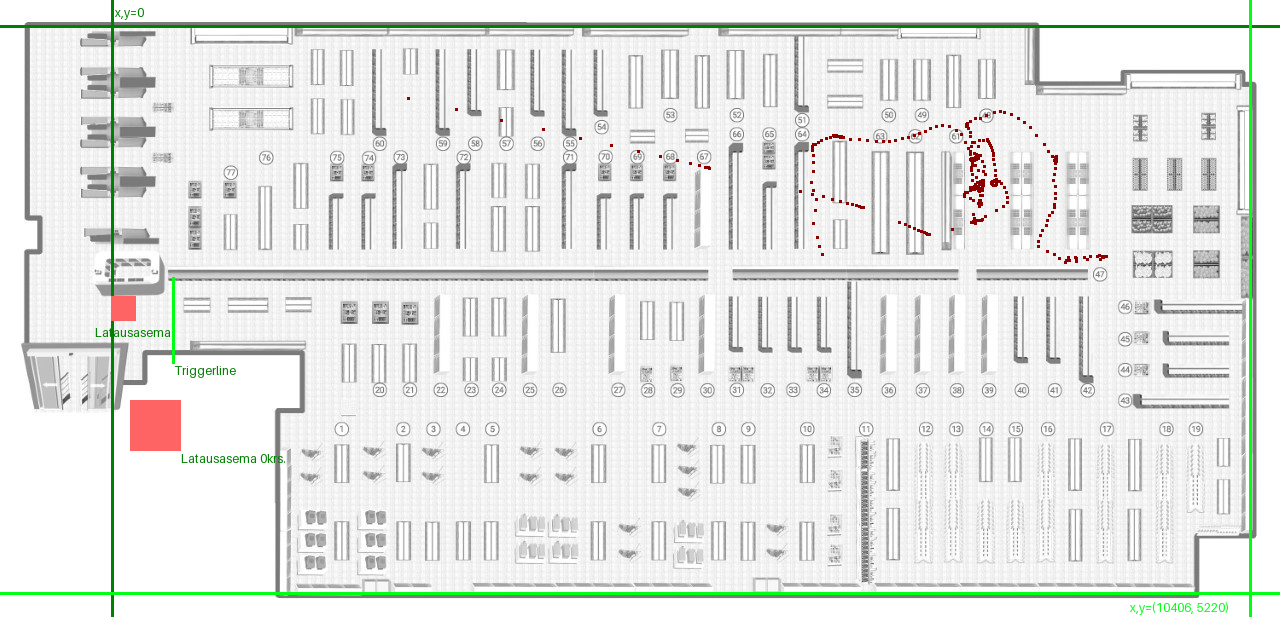

(122.1047619047619, 296.3009708737864)


In [761]:
#piirrä kuvaan
draw(df_lim)


In [634]:
#y-akselin väärien arvojen löytäminen
#test= df_lim[(df_lim['y'] < 200) & (df_lim['y'] > 100)]
#test= df_lim[df_lim['y'] > 4900]

In [345]:
#test.describe()

#test[test['y'] == 5050].count()

